In [1]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
import hax
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from matplotlib.colors import LogNorm
from collections import defaultdict
from array import array
import pylab
from hax import cuts

In [3]:
# import data samples and run names

rn_samp = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_rn_event_combine/170313_1055.pkl')
ng_samp = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_ng_event_combine/170524_1451.pkl')
ambe_samp = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_ambe_event_combine/170316_0834.pkl')

rn_run_names = pd.read_pickle('/home/shawaf/calibration_data/run_names_v6.6.5_rn.pkl')
ng_run_names = pd.read_pickle('/home/shawaf/calibration_data/run_names_v6.6.5_ng.pkl')
ambe_run_names = pd.read_pickle('/home/shawaf/calibration_data/run_names_v6.6.5_ambe.pkl')

In [4]:
def ses2_size_cut_ori(s2_area):
    linear_0 = s2_area * 0.00832 + 72.3
    linear_1 = s2_area * 0.03 - 109
    fermi_dirac_coef_0 = 1 / (np.exp((s2_area - 23300) * 5.91e-4) + 1)
    fermi_dirac_coef_1 = 1 / (np.exp((23300 - s2_area) * 5.91e-4) + 1)
    return linear_0*fermi_dirac_coef_0+linear_1*fermi_dirac_coef_1

In [5]:
# Create dataframes with all rn, ng, ambe
import os

ng = pd.DataFrame(columns = list(ng_samp))
rn = pd.DataFrame(columns = list(rn_samp))
ambe = pd.DataFrame(columns = list(ambe_samp))

for filename in os.listdir('/home/shawaf/calibration_data/pax_v6.6.5_ng_event_combine/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_ng_event_combine/' + str(filename))
    ng = ng.append(df)
    
for filename in os.listdir('/home/shawaf/calibration_data/pax_v6.6.5_rn_event_combine/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_rn_event_combine/' + str(filename))
    rn = rn.append(df)

for filename in os.listdir('/home/shawaf/calibration_data/pax_v6.6.5_ambe_event_combine/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/pax_v6.6.5_ambe_event_combine/' + str(filename))
    ambe = ambe.append(df)
    
nng = ng
rambe = ambe
rrn = rn

In [6]:
# assigning classes based on which calibration data

ambe['class'] = 0
ng['class'] = 1
rn['class'] = 2

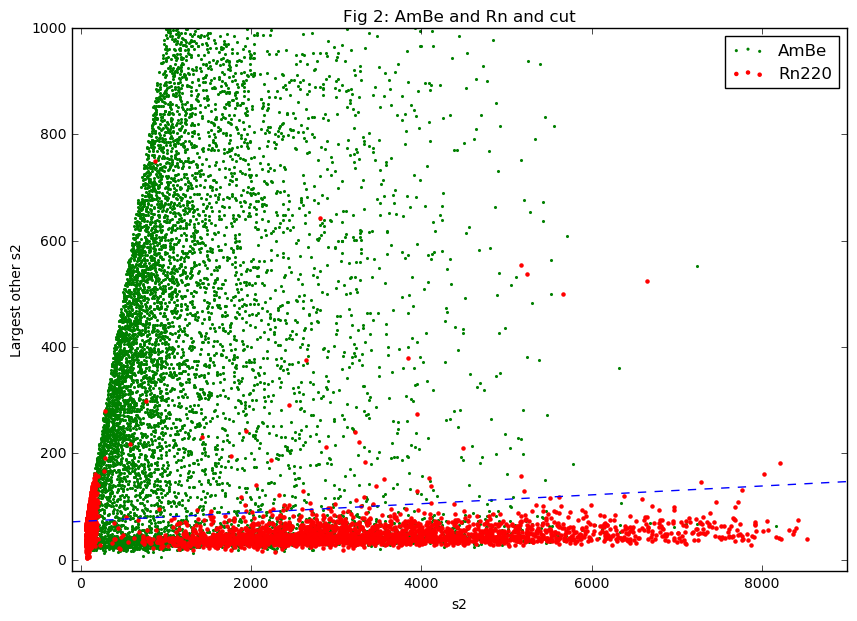

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(rambe["s2"],rambe["s2_1_area"],color='green',marker='.', lw=0, alpha=1,label='AmBe')
plt.scatter(rrn["s2"], rrn["s2_1_area"],color='r',marker='.',label="Rn220")

plt.title("Fig 2: AmBe and Rn and cut")

x = np.linspace(-100,10000,10000)
plt.plot(x,ses2_size_cut_ori(x),linestyle='--')

plt.xlabel("s2")
plt.ylabel("Largest other s2")

plt.legend(loc='upper right')

plt.xlim(-100,9000)
plt.ylim(-20,1000)
plt.show()

In [11]:
ndf = ambe.append(rn)
ndf.dropna(how='all');

In [12]:
# deciding what to put in the NaN's. Although I drop most of these features. There's got to be a better way to do this

nafill = pd.DataFrame({'class' : 0.0,
 'cs1' : 0.0,
 'cs2': 0.0,
 'drift_time': 0.0,
 'event_number': 0.0,
 'run_number': 0.0,
 's1': 0.0,
 's1_area_fraction_top': 0.0,
 's1_pattern_fit': 0.0,
 's1_range_50p_area': 0.0,
 's1_rise_time': 0.0,
 's2': 0.0,
 's2_1_area': 0.0,
 's2_1_area_fraction_top': 0.0,
 's2_1_corrected_area': 0.0,
 's2_1_delay_is1': 0.0,
 's2_1_delay_is2': 0.0,
 's2_1_range_50p_area': 0.0,
 's2_1_x': 1000.0,
 's2_1_y': 1000.0,
 's2_1_z': 1000.0,
 's2_2_area': 0.0,
 's2_2_area_fraction_top': 0.0,
 's2_2_corrected_area': 0.0,
 's2_2_delay_is1': 0.0,
 's2_2_delay_is2': 0.0,
 's2_2_range_50p_area': 0.0,
 's2_2_x': 1000.0,
 's2_2_y': 1000.0,
 's2_2_z': 1000.0,
 's2_3_area': 0.0,
 's2_3_area_fraction_top': 0.0,
 's2_3_corrected_area': 0.0,
 's2_3_delay_is1': 0.0,
 's2_3_delay_is2': 0.0,
 's2_3_range_50p_area': 0.0,
 's2_3_x': 1000.0,
 's2_3_y': 1000.0,
 's2_3_z': 1000.0,
 's2_4_area': 0.0,
 's2_4_area_fraction_top': 0.0,
 's2_4_corrected_area': 0.0,
 's2_4_delay_is1': 0.0,
 's2_4_delay_is2': 0.0,
 's2_4_range_50p_area': 0.0,
 's2_4_x': 1000.0,
 's2_4_y': 1000.0,
 's2_4_z': 1000.0,
 's2_5_area': 0.0,
 's2_5_area_fraction_top': 0.0,
 's2_5_corrected_area': 0.0,
 's2_5_delay_is1': 0.0,
 's2_5_delay_is2': 0.0,
 's2_5_range_50p_area': 0.0,
 's2_5_x': 1000.0,
 's2_5_y': 1000.0,
 's2_5_z': 1000.0,
 's2_area_fraction_top': 0.0,
 's2_pattern_fit': 0.0,
 's2_range_50p_area': 0.0,
 's2_rise_time': 0.0,
 'x': 1000.0,
 'y': 1000.0,
 'z': 1000.0}, index = [ndf.index])

ngnafill = pd.DataFrame({'class' : 0.0,
 'cs1' : 0.0,
 'cs2': 0.0,
 'drift_time': 0.0,
 'event_number': 0.0,
 'run_number': 0.0,
 's1': 0.0,
 's1_area_fraction_top': 0.0,
 's1_pattern_fit': 0.0,
 's1_range_50p_area': 0.0,
 's1_rise_time': 0.0,
 's2': 0.0,
 's2_1_area': 0.0,
 's2_1_area_fraction_top': 0.0,
 's2_1_corrected_area': 0.0,
 's2_1_delay_is1': 0.0,
 's2_1_delay_is2': 0.0,
 's2_1_range_50p_area': 0.0,
 's2_1_x': 1000.0,
 's2_1_y': 1000.0,
 's2_1_z': 1000.0,
 's2_2_area': 0.0,
 's2_2_area_fraction_top': 0.0,
 's2_2_corrected_area': 0.0,
 's2_2_delay_is1': 0.0,
 's2_2_delay_is2': 0.0,
 's2_2_range_50p_area': 0.0,
 's2_2_x': 1000.0,
 's2_2_y': 1000.0,
 's2_2_z': 1000.0,
 's2_3_area': 0.0,
 's2_3_area_fraction_top': 0.0,
 's2_3_corrected_area': 0.0,
 's2_3_delay_is1': 0.0,
 's2_3_delay_is2': 0.0,
 's2_3_range_50p_area': 0.0,
 's2_3_x': 1000.0,
 's2_3_y': 1000.0,
 's2_3_z': 1000.0,
 's2_4_area': 0.0,
 's2_4_area_fraction_top': 0.0,
 's2_4_corrected_area': 0.0,
 's2_4_delay_is1': 0.0,
 's2_4_delay_is2': 0.0,
 's2_4_range_50p_area': 0.0,
 's2_4_x': 1000.0,
 's2_4_y': 1000.0,
 's2_4_z': 1000.0,
 's2_5_area': 0.0,
 's2_5_area_fraction_top': 0.0,
 's2_5_corrected_area': 0.0,
 's2_5_delay_is1': 0.0,
 's2_5_delay_is2': 0.0,
 's2_5_range_50p_area': 0.0,
 's2_5_x': 1000.0,
 's2_5_y': 1000.0,
 's2_5_z': 1000.0,
 's2_area_fraction_top': 0.0,
 's2_pattern_fit': 0.0,
 's2_range_50p_area': 0.0,
 's2_rise_time': 0.0,
 'x': 1000.0,
 'y': 1000.0,
 'z': 1000.0}, index = [nng.index])

### Choosing which features the classifier takes and filling NaN's

In [15]:
%%capture
keep = ['class','s2','s2_range_50p_area', 's2_1_x','s2_1_y','s2_2_x','s2_2_y','s2_3_x','s2_3_y','s2_4_x','s2_4_y',
        's2_1_z','s2_2_z','s2_3_z','s2_4_z',
        's2_1_delay_is2','s2_2_delay_is2','s2_3_delay_is2','s2_4_delay_is2',
        's2_1_range_50p_area', 's2_1_area',
       's2_2_range_50p_area', 's2_2_area',
       's2_3_range_50p_area', 's2_3_area',
       's2_4_range_50p_area', 's2_4_area']

todrop = ['s2_1_x','s2_1_y','s2_2_x','s2_2_y','s2_3_x','s2_3_y','s2_4_x','s2_4_y']

toadd = ['s2_1_r','s2_2_r','s2_3_r','s2_4_r']

# DataFrame after ss cut
df = ndf
df = ndf.fillna(value = nafill);
df = df[keep]

# DataFrame without ss linear cut
rdf = nrdf
rdf = nrdf.fillna(value = rnafill);
rdf = rdf[keep]

# NG data
ng = nng
ng = ng.fillna(value = ngnafill);
ng = ng[keep]
ng = ng[ng.s2>200]

# applying simple cuts and giving r values to all df's

keep = sorted(list((set(keep) - set(todrop)).union(set(toadd))))

df = df[df.s2>200]
df['s2_1_r'] = np.sqrt(df['s2_1_x']**2 + df['s2_1_y']**2)
df['s2_2_r'] = np.sqrt(df['s2_2_x']**2 + df['s2_2_y']**2)
df['s2_3_r'] = np.sqrt(df['s2_3_x']**2 + df['s2_3_y']**2)
df['s2_4_r'] = np.sqrt(df['s2_4_x']**2 + df['s2_4_y']**2)

df = df[keep]

rdf = rdf[rdf.s2>200]
rdf['s2_1_r'] = np.sqrt(rdf['s2_1_x']**2 + rdf['s2_1_y']**2)
rdf['s2_2_r'] = np.sqrt(rdf['s2_2_x']**2 + rdf['s2_2_y']**2)
rdf['s2_3_r'] = np.sqrt(rdf['s2_3_x']**2 + rdf['s2_3_y']**2)
rdf['s2_4_r'] = np.sqrt(rdf['s2_4_x']**2 + rdf['s2_4_y']**2)

rdf = rdf[keep]

ng = ng[ng.s2>200]
ng['s2_1_r'] = np.sqrt(ng['s2_1_x']**2 + ng['s2_1_y']**2)
ng['s2_2_r'] = np.sqrt(ng['s2_2_x']**2 + ng['s2_2_y']**2)
ng['s2_3_r'] = np.sqrt(ng['s2_3_x']**2 + ng['s2_3_y']**2)
ng['s2_4_r'] = np.sqrt(ng['s2_4_x']**2 + ng['s2_4_y']**2)

ng = ng[keep]

In [16]:
print("keeping",keep)

keeping ['class', 's2', 's2_1_area', 's2_1_delay_is2', 's2_1_r', 's2_1_range_50p_area', 's2_1_z', 's2_2_area', 's2_2_delay_is2', 's2_2_r', 's2_2_range_50p_area', 's2_2_z', 's2_3_area', 's2_3_delay_is2', 's2_3_r', 's2_3_range_50p_area', 's2_3_z', 's2_4_area', 's2_4_delay_is2', 's2_4_r', 's2_4_range_50p_area', 's2_4_z', 's2_range_50p_area']


In [17]:
# import sklearn

from sklearn.cross_validation import train_test_split
X, y = df.iloc[:,1:].values, df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Fitting the Random Forests

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [20]:
%%capture
feat_labels = df.columns[1:]

importances = rfc.feature_importances_
indicies = np.argsort(importances)[::-1]
for f in  range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indicies[f]],
                           importances[indicies[f]]))

In [21]:
print("RandomForest test score is:" ,rfc.score(X_test, y_test))

With cut, RandomForest test score is: 0.998661759786
Without cut, RandomForest test score is: 0.896899224806


## How important each feature is

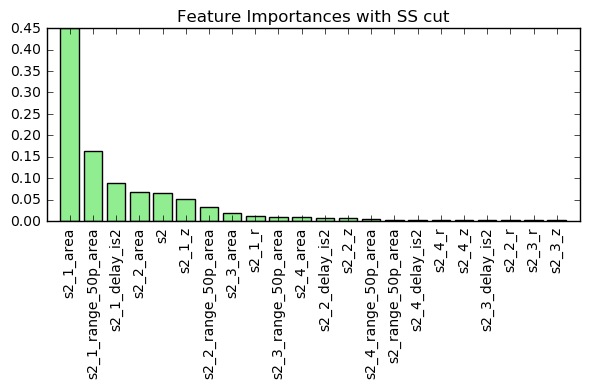

In [22]:
plt.title('Feature Importances with SS cut')
plt.bar(range(X_train.shape[1]),
       importances[indicies],
       color='lightgreen',
       align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indicies], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [24]:
y_pred = rfc.predict(X_test)

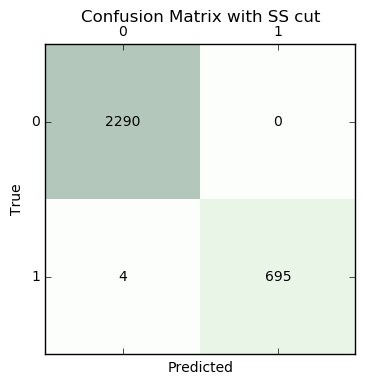

In [25]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
rconfmat = confusion_matrix(y_true=ry_test, y_pred=ry_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.title('Confusion Matrix with SS cut')

plt.xlabel('Predicted')
plt.ylabel('True')
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [27]:
a = rfc.predict(np.array(ng)[:,1:])

In [28]:
b = np.unique(a, return_counts=True)
sm = b[1][0] + b[1][1]
print("RandomForest applied to NG data with cut. \n Proportion classified as AmBe/MS: %s \n Proportion classified as Rn/SS: %s " % (str(b[1][0]/sm),str(b[1][1]/sm)))

RandomForest applied to NG data with cut. 
 Proportion classified as AmBe/MS: 0.762837934487 
 Proportion classified as Rn/SS: 0.237162065513 


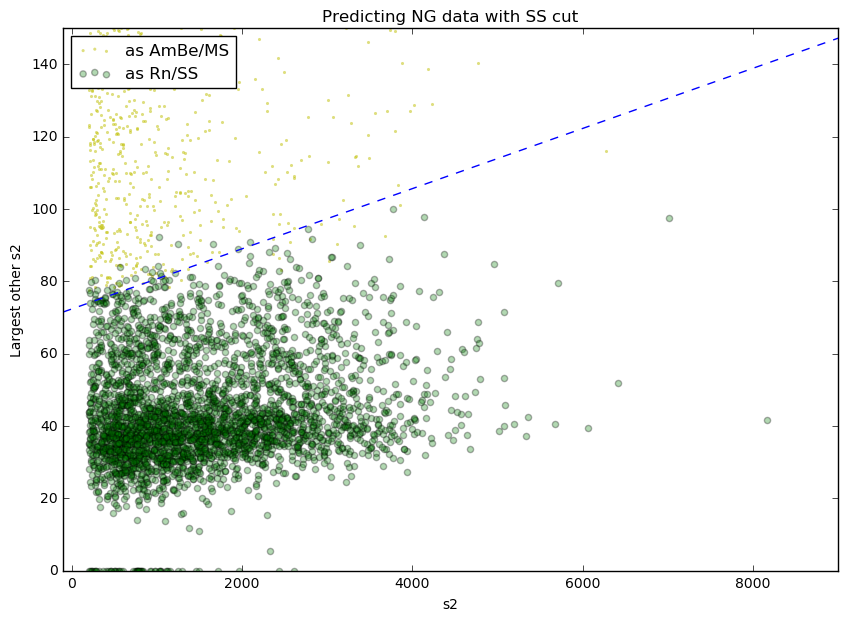

Number of NG data predicted as AmBe/MS within SS cut: 19
Number of NG data predicted as Rn/SS outside SS cut: 28


In [30]:
ng['predicted_class'] = a
plt.figure(figsize=(10,7))

plt.scatter(ng[ng['predicted_class'] == 0]["s2"],ng[ng['predicted_class'] == 0]["s2_1_area"],
            c='y', marker = '.', lw=0 , alpha = .5, label = "as AmBe/MS")
plt.scatter(ng[ng['predicted_class'] == 2]["s2"],ng[ng['predicted_class'] == 2]["s2_1_area"],
            c='g', marker = 'o', alpha = .3,label = "as Rn/SS")


x = np.linspace(-100,10000,10000)
plt.plot(x,ses2_size_cut_ori(x),linestyle='--')

plt.xlim(-100,9000)
plt.ylim(0,150)

plt.title("Predicting NG data with SS cut")
plt.xlabel("s2")
plt.ylabel("Largest other s2")

plt.legend(loc='upper left')
plt.show()

r = ng[(ng['predicted_class'] == 0) & (ng['s2_1_area'] <= ses2_size_cut_ori(ng['s2']))]['class'].count()
q = ng[(ng['predicted_class'] == 2) & (ng['s2_1_area'] >= ses2_size_cut_ori(ng['s2']))]['class'].count()

print('Number of NG data predicted as AmBe/MS within SS cut:',r)
print('Number of NG data predicted as Rn/SS outside SS cut:',q)

In [33]:
y_pred_proba = rfc.predict_proba(np.array(ng.drop("predicted_class",1))[:,1:])
ry_pred_proba = rfc1.predict_proba(np.array(ng.drop("predicted_class",1))[:,1:])

## Truncated at ends b/c scaling, amount of ambiguity:

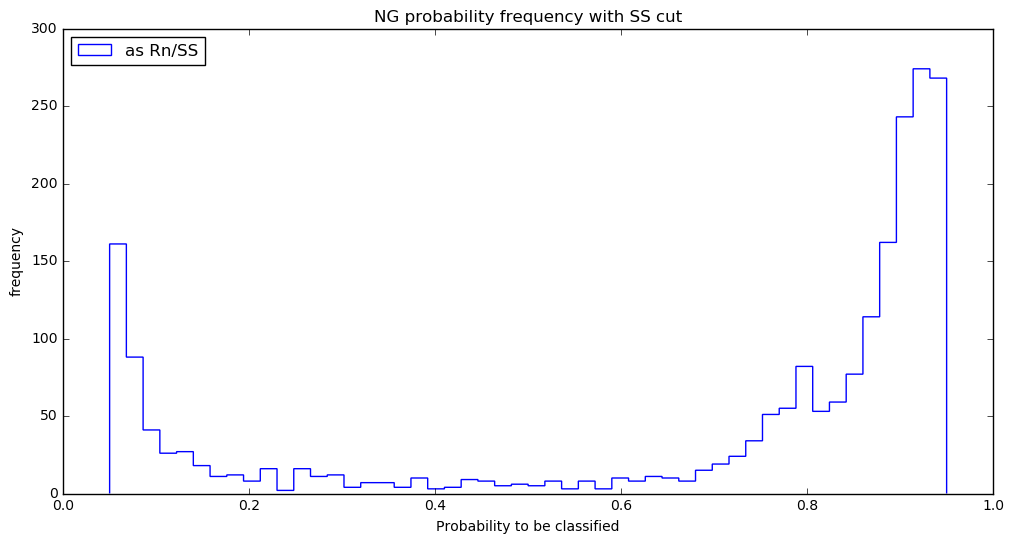

In [34]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.hist(y_pred_proba.T[1], bins = 50,histtype = 'step', linestyle = 'solid',range = (0.05,.95),label = 'as Rn/SS')

plt.legend(loc='upper left')
plt.xlabel('Probability to be classified')
plt.ylabel('frequency')
plt.title('NG probability')
plt.show()

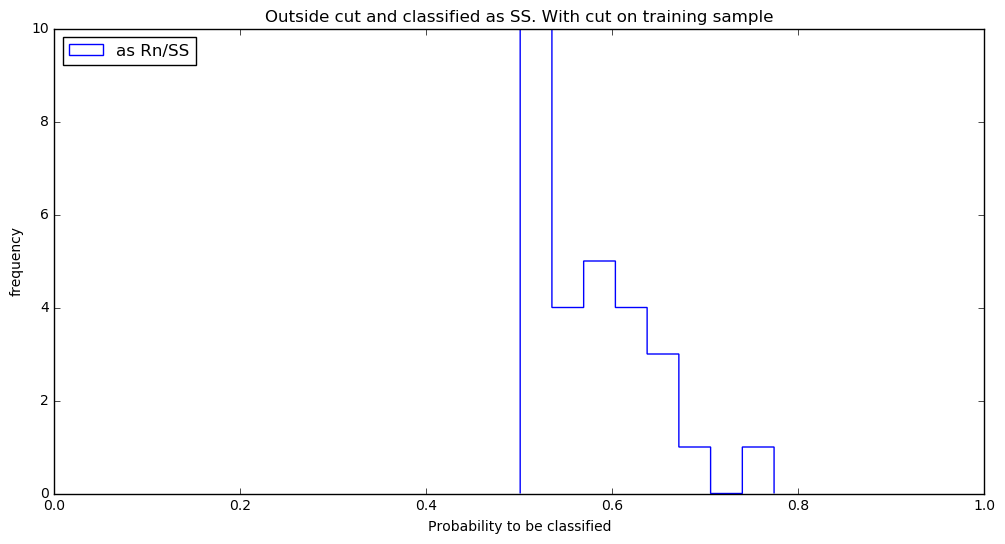

In [36]:
ng['predicted_class'] = a
fp = ng[(ng['predicted_class'] == 2) & (ng['s2_1_area'] >= ses2_size_cut_ori(ng['s2']))]
del fp['predicted_class']

fpp = rfc.predict_proba(np.array(fp)[:,1:])

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.hist(fpp.T[1], bins = 8,histtype = 'step', linestyle = 'solid',label = 'as Rn/SS')

plt.xlim(0,1)

plt.legend(loc='upper left')
plt.xlabel('Probability to be classified')
plt.ylabel('frequency')
plt.title('Outside cut and classified as SS. With cut on training sample')
plt.show()

In [38]:
u = y_pred_proba.T[1]
v = ((u>.2)&(u<.8)).sum()
print("With SS cut: Amount of events with probabilities to be classified between 20% and 80%:", v)

With SS cut: Amount of events with probabilities to be classified between 20% and 80%: 463
